<a href="https://colab.research.google.com/github/ashar1212/YoungDevInterns_Data_Analyst_Tasks/blob/main/Copy_of_Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel("/content/Data_Train.xlsx")

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.isnull().sum()


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
Total_Stops,0
Price,0
Journey_Day,0
Journey_Month,0
Dep_Hour,0
...,...
Additional_Info_In-flight meal not included,0
Additional_Info_No Info,0
Additional_Info_No check-in baggage included,0
Additional_Info_No info,0


In [ ]:
df.duplicated().sum()


220

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()
df.duplicated().sum()

0

In [ ]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [ ]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'], axis=1, inplace=True)
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis=1, inplace=True)


<ipython-input-44-acb7c9f525ca>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
<ipython-input-44-acb7c9f525ca>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
<ipython-input-44-acb7c9f525ca>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
<ipython-input-44-acb7c9f525ca>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

In [ ]:
df['Duration_Hours'] = df['Duration'].str.extract(r'(\d+)h')[0].astype(float).fillna(0)
df['Duration_Minutes'] = df['Duration'].str.extract(r'(\d+)m')[0].astype(float).fillna(0)
df.drop(['Duration'], axis=1, inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], drop_first=True)


In [ ]:
stops_mapping = {
    'non-stop': 0, '1 stop': 1, '2 stops': 2,
    '3 stops': 3, '4 stops': 4
}
df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)


In [ ]:
df.info()  # Check columns' data types

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Columns: 166 entries, Total_Stops to Additional_Info_Red-eye flight
dtypes: bool(156), float64(2), int32(6), int64(2)
memory usage: 2.2 MB


In [ ]:
X = df.drop(columns=['Price'])  # Features (Independent Variables)
y = df['Price']  # Target Variable (Price)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Initialize & Train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 628.5329239968106
MSE: 2019697.7740787868
R² Score: 0.903133285263366


In [ ]:
print(X_train.shape, y_train.shape)

(8369, 165) (8369,)


In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Total_Stops                                     0
Journey_Day                                     0
Journey_Month                                   0
Dep_Hour                                        0
Dep_Minute                                      0
                                               ..
Additional_Info_In-flight meal not included     0
Additional_Info_No Info                         0
Additional_Info_No check-in baggage included    0
Additional_Info_No info                         0
Additional_Info_Red-eye flight                  0
Length: 165, dtype: int64
0


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

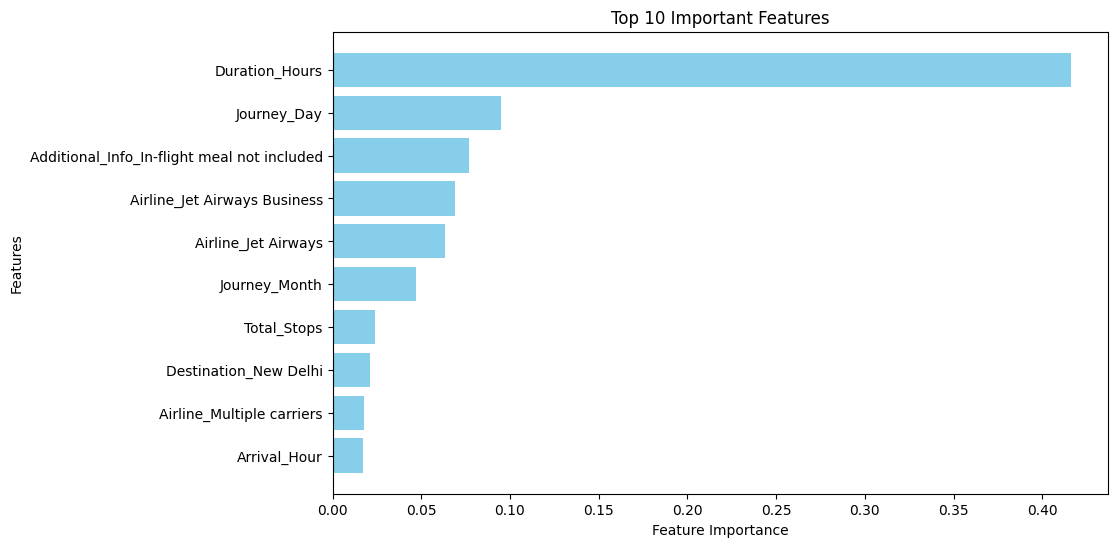

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance Plot
importances = rf_model.feature_importances_
features = np.array(X.columns)

sorted_idx = np.argsort(importances)[-10:]  # Top 10 Features
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
import joblib

# Save Model
joblib.dump(rf_model, "flight_price_model.pkl")
print("Model saved successfully!")


Model saved successfully!
